 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_data = Path("Resources/whale_returns.csv")
whale_pd = pd.read_csv(whale_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_pd = whale_pd.sort_index()
whale_pd.head()


/var/folders/x6/vqfb83ms57x5jxss3rdsmrhr0000gn/T/ipykernel_13394/2747064604.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_pd = pd.read_csv(whale_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_pd = whale_pd.dropna()

#Check for remaining duplicates
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_data = Path("Resources/algo_returns.csv")
algo_pd = pd.read_csv(algo_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_pd = algo_pd.sort_index()
algo_pd.head()

/var/folders/x6/vqfb83ms57x5jxss3rdsmrhr0000gn/T/ipykernel_13394/1932321038.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_pd = pd.read_csv(algo_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_pd = algo_pd.dropna()

#Check for remaining duplicates
algo_pd.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_returns_data = Path("Resources/sp500_history.csv")
sp500_pd = pd.read_csv(sp500_returns_data)

# Check Data Types
sp500_pd.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [9]:
# Fix Data Types #
##################

# Make date the index
sp500_pd = pd.read_csv(sp500_returns_data)
sp500_pd = pd.read_csv(sp500_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# put in chronological order
sp500_pd = sp500_pd.sort_index()

#remove $$ signs
sp500_pd['Close'] = sp500_pd['Close'].str.replace("$", "")

#convert close column to float
sp500_pd = sp500_pd.astype("float")
sp500_pd = sp500_pd.sort_index()

sp500_pd.head()

/var/folders/x6/vqfb83ms57x5jxss3rdsmrhr0000gn/T/ipykernel_13394/1552725369.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_pd = pd.read_csv(sp500_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
/var/folders/x6/vqfb83ms57x5jxss3rdsmrhr0000gn/T/ipykernel_13394/1552725369.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_pd = pd.read_csv(sp500_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [10]:
# Calculate Daily Returns
sp500_pd=sp500_pd.pct_change()
sp500_pd

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [11]:
# Drop nulls
sp500_pd = sp500_pd.dropna()
#Check for remaining duplicates
sp500_pd.isnull().sum()

Close    0
dtype: int64

In [12]:
# Rename `Close` Column to be specific to this portfolio.
sp500_pd.columns = ['sp500']

## Combine Whale, Algorithmic, and S&P 500 Returns

In [13]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_pd, algo_pd, sp500_pd], axis=1, join="outer")
all_returns = all_returns.dropna()
all_returns.head()
#visualize in new csv with all data
all_returns.to_csv('all_return.csv')

all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

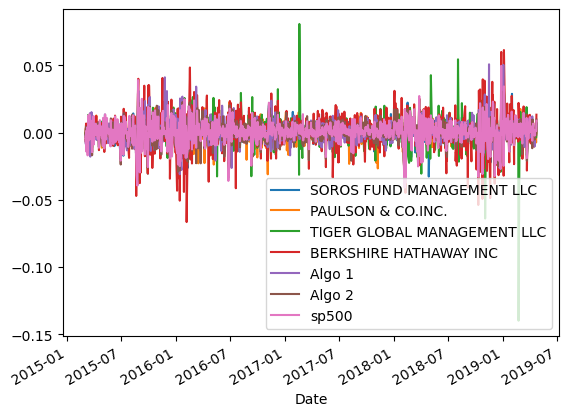

In [14]:
# Plot daily returns of all portfolios
all_returns.plot()


#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

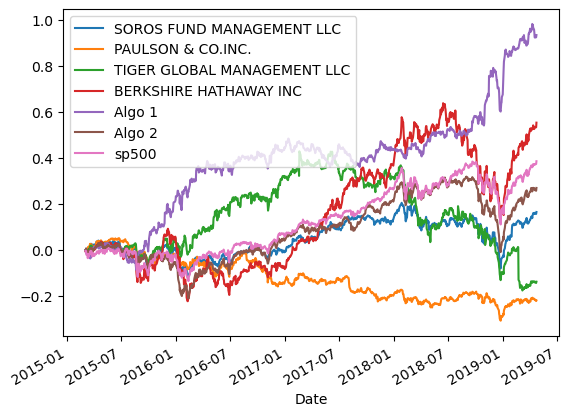

In [15]:
# Calculate cumulative returns of all portfolios
all_cumulative_returns = (1 + all_returns).cumprod() - 1
all_cumulative_returns
# Plot cumulative returns
all_cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


Text(0.5, 1.0, 'Risk')

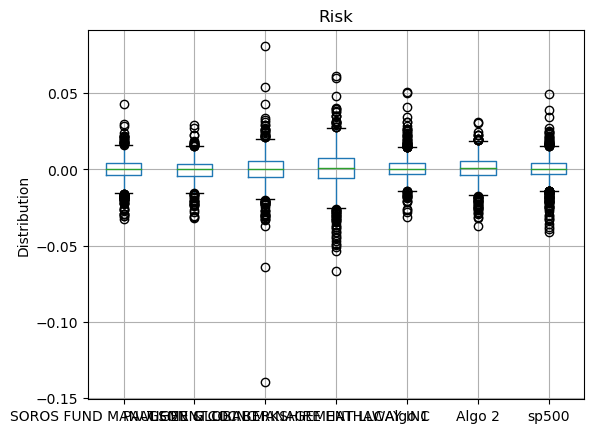

In [16]:
# Box plot to visually show risk
box_plot = all_returns.boxplot()
box_plot.set_ylabel('Distribution')
box_plot.set_title('Risk')

### Calculate Standard Deviations

In [17]:
# Calculate the daily standard deviations of all portfolios
###########################################################

# Calculate daily changes (current day minus previous day)
daily_changes = all_returns.diff()

# Calculate standard deviation of daily changes
daily_std_deviation = daily_changes.std()

daily_std_deviation

SOROS FUND MANAGEMENT LLC      0.010845
PAULSON & CO.INC.              0.009724
TIGER GLOBAL MANAGEMENT LLC    0.015591
BERKSHIRE HATHAWAY INC         0.018183
Algo 1                         0.010225
Algo 2                         0.011360
sp500                          0.012207
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [18]:
# Determine which portfolios are riskier than the S&P 500
## Berkshire & Tiger are riskier 

### Calculate the Annualized Standard Deviation

In [19]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std_deviation * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.172166
PAULSON & CO.INC.              0.154356
TIGER GLOBAL MANAGEMENT LLC    0.247493
BERKSHIRE HATHAWAY INC         0.288651
Algo 1                         0.162318
Algo 2                         0.180338
sp500                          0.193779
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

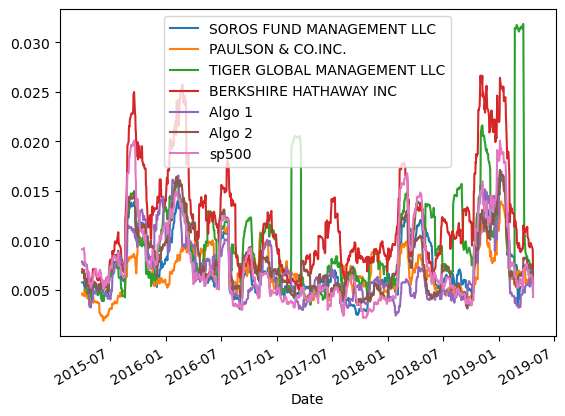

In [20]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = all_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

In [21]:
# Calculate the correlation
correlation_matrix = all_returns.corr()
# Display the correlation matrix
correlation_matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

/var/folders/x6/vqfb83ms57x5jxss3rdsmrhr0000gn/T/ipykernel_13394/958765870.py:10: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  berkshire_pd = pd.read_csv(berkshire_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


<Axes: >

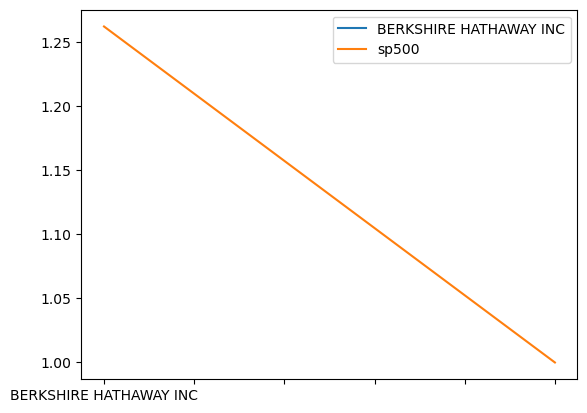

In [22]:
# Calculate covariance of a single portfolio
#############################################

# create 'just' berkshire csv
berkshire = whale_pd[['BERKSHIRE HATHAWAY INC']].reset_index()
berkshire.to_csv('Berkshire.csv', index=False)

#import berkshire csv
berkshire_data = Path("Berkshire.csv")
berkshire_pd = pd.read_csv(berkshire_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
berkshire_pd = berkshire_pd.sort_index()
berkshire_pd = berkshire_pd.dropna()
berk_sp500 = pd.concat([berkshire_pd, sp500_pd],axis=1, join="outer")

# #calculate berkshire covariance
covariance = berk_sp500.cov()

# Calculate variance of S&P 500
sp500_variance = sp500_pd.var()
# Computing beta
beta = covariance / sp500_variance
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [23]:
# Use `ewm` to calculate the rolling window
all_returns = all_returns.dropna()
weighted_moving = all_returns.ewm(halflife=21).std()
weighted_moving = weighted_moving.dropna()
weighted_moving

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.002947,0.007315,0.008454
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [24]:
# # Annualized Sharpe Ratios
# ########################## 
sharpe_ratios = ((all_returns.mean()-all_returns['sp500'].mean()) * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
Algo 1                         0.650964
Algo 2                        -0.163336
sp500                          0.000000
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

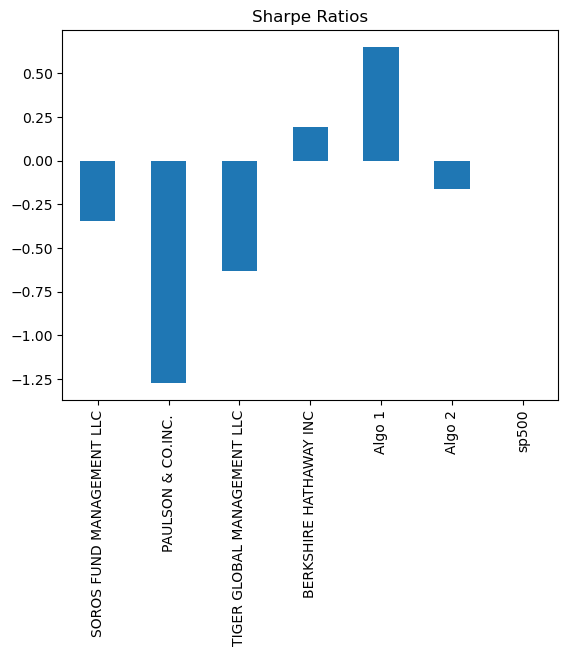

In [25]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 has a great sharp ratio and significantly outperforms both the S&P and the other portfolios. It also has a significantly better sharp ratio than the other portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [26]:
# Reading data from Apple
apple_data = Path("Resources/aapl_historical.csv")
apple_pd = pd.read_csv(apple_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_pd = apple_pd.sort_index()

#remove symbol column data
apple = apple_pd[['NOCP']]

#rename NOCP column
apple.columns = ['AAPL']

apple.head()

/var/folders/x6/vqfb83ms57x5jxss3rdsmrhr0000gn/T/ipykernel_13394/1298403925.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  apple_pd = pd.read_csv(apple_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [27]:
# Reading data from google
google_data = Path("Resources/goog_historical.csv")
google_pd = pd.read_csv(google_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_pd = google_pd.sort_index()

#remove symbol column data
google = google_pd[['NOCP']]

#rename NOCP column
google.columns = ['GOOGL']

google.head()

/var/folders/x6/vqfb83ms57x5jxss3rdsmrhr0000gn/T/ipykernel_13394/1232819716.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  google_pd = pd.read_csv(google_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


,GOOGL
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [28]:
# Reading data from costco
costco_data = Path("Resources/cost_historical.csv")
costco_pd = pd.read_csv(costco_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_pd = costco_pd.sort_index()

#remove symbol column data
costco = costco_pd[['NOCP']]

#rename NOCP column to apple
costco.columns = ['COST']

costco.head()

/var/folders/x6/vqfb83ms57x5jxss3rdsmrhr0000gn/T/ipykernel_13394/2858280948.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  costco_pd = pd.read_csv(costco_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [29]:
# Combine all stocks in a single DataFrame
portfolio = pd.concat([apple, costco, google], axis=1, join="outer")
portfolio.head()

,AAPL,COST,GOOGL
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [30]:
# Reset Date index
#done

In [31]:
# Reorganize portfolio data by having a column per symbol
#done


Number of Duplicate Rows: 0


<Axes: xlabel='Trade DATE'>

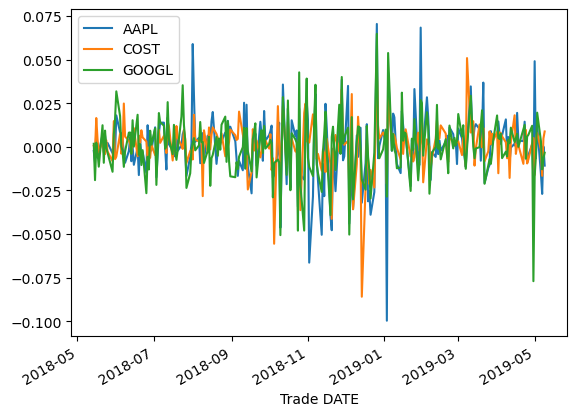

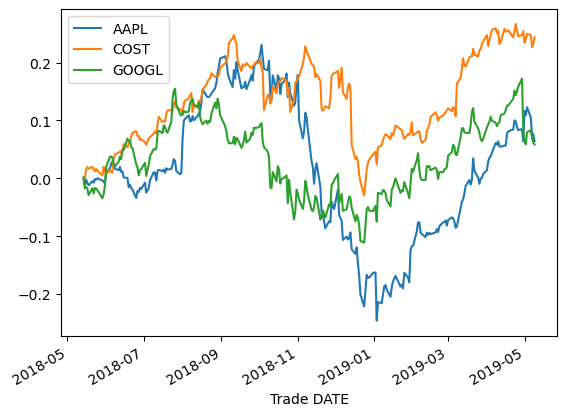

In [32]:
# Calculate daily returns
daily_returns=portfolio.pct_change()

# Drop nulls
daily_returns= daily_returns.dropna()

#Check for remaining duplicates
duplicates = daily_returns.duplicated()
print("\nNumber of Duplicate Rows:", duplicates.sum())

# Display sample data
daily_returns.plot()


# Calculate cumulative returns of all portfolios
cum_returns = (1+daily_returns).cumprod() - 1

# Plot cumulative returns
cum_returns.plot()






## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<Axes: xlabel='Trade DATE'>

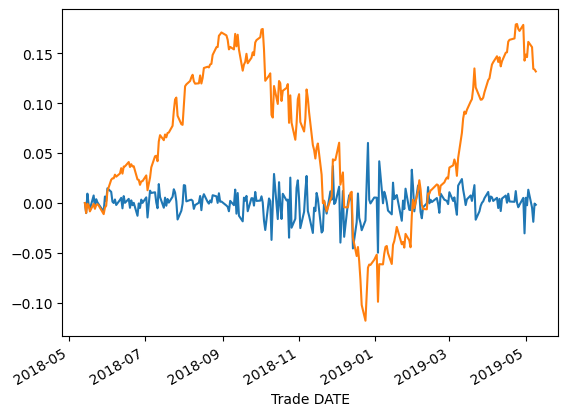

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

# Display sample data
portfolio_returns.plot()

portfolio_cumulative_returns = (1+portfolio_returns).cumprod() - 1
portfolio_cumulative_returns.plot()



## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
total_returns = pd.concat([all_returns, portfolio_returns], axis=1, join="outer")
total_returns.head()

#visualize in new csv with all data
total_returns.to_csv('total_return.csv') 

In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_returns = total_returns.dropna()
total_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
sp500                          0
0                              0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
changes = total_returns.diff()

# Calculate standard deviation of daily changes
day_std_deviation = changes.std()
day_std_deviation

SOROS FUND MANAGEMENT LLC      0.012522
PAULSON & CO.INC.              0.009964
TIGER GLOBAL MANAGEMENT LLC    0.021192
BERKSHIRE HATHAWAY INC         0.022230
Algo 1                         0.010812
Algo 2                         0.011760
sp500                          0.013704
0                              0.019358
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

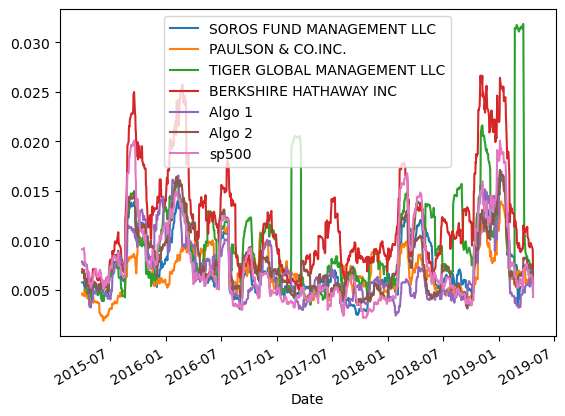

In [37]:
# Calculate rolling standard deviation
rolling_std_2 = total_returns.rolling(window=21).std()
rolling_std_2 = rolling_std.dropna()
rolling_std_2
# Plot rolling standard deviation
rolling_std_2.plot()

### Calculate and plot the correlation

<Axes: >

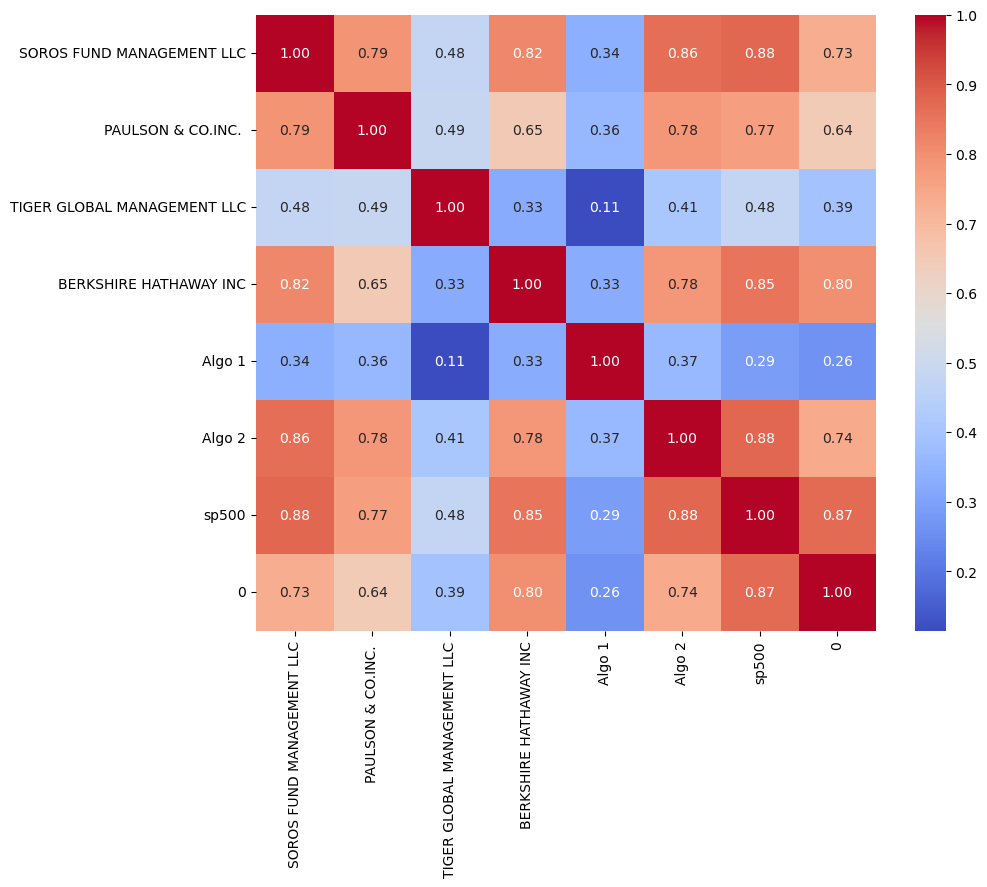

In [38]:
#imports for correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and plot the correlation
total_correlation = total_returns.corr()
# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(total_correlation, annot=True, fmt=".2f", cmap='coolwarm')


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': '60-Day Rolling Beta'}, xlabel='Date'>

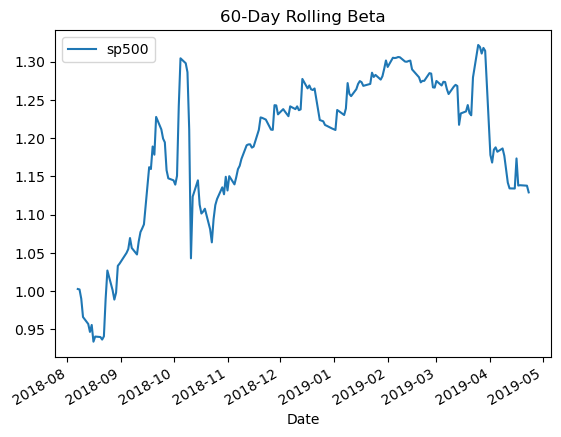

In [39]:
# Calculate and plot Beta

# #isolate S&P and portfolio into single df
# portfolio_sp500 = pd.concat([portfolio_returns, sp500_pd],axis=1, join="outer")

# # #calculate portfolio covariance
# rolling_covariance = portfolio_sp500.rolling(window=60).cov()

# # Calculate variance of S&P 500
# rolling_sp500_variance = sp500_pd.rolling(window=60).var()

# # Computing beta
# beta = rolling_covariance / rolling_sp500_variance
# beta.plot()


rolling_covariance = portfolio_returns.rolling(window=60).cov(sp500_pd)
rolling_variance = sp500_pd.rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(title='60-Day Rolling Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualized Sharpe Ratios
total_sharpe = ((total_returns.mean()-total_returns['sp500'].mean()) * 252) / (total_returns.std() * np.sqrt(252))
total_sharpe

SOROS FUND MANAGEMENT LLC     -0.175552
PAULSON & CO.INC.             -0.503043
TIGER GLOBAL MANAGEMENT LLC   -1.416635
BERKSHIRE HATHAWAY INC        -0.200036
Algo 1                         1.370582
Algo 2                        -0.556585
sp500                          0.000000
0                              0.512669
dtype: float64

<Axes: title={'center': 'Total Sharpe Ratios'}>

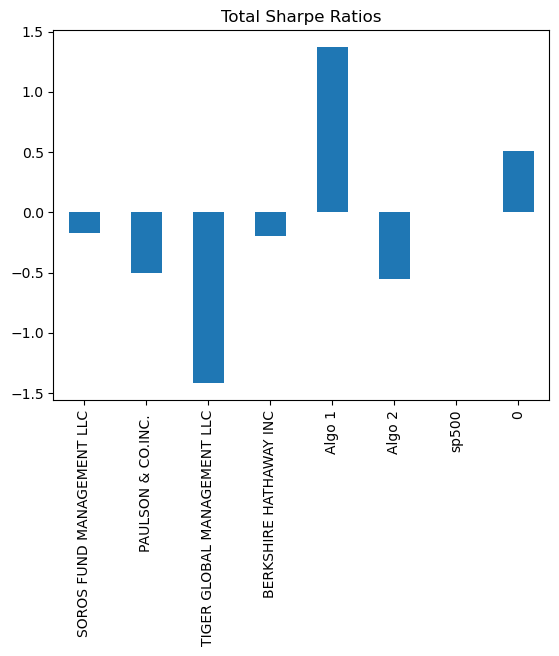

In [41]:
# Visualize the sharpe ratios as a bar plot
total_sharpe.plot(kind="bar", title="Total Sharpe Ratios")

<Axes: >

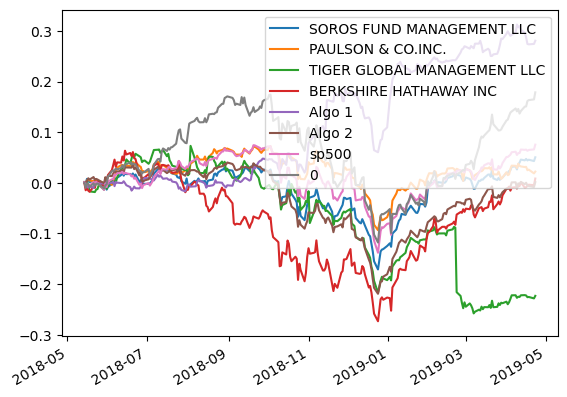

In [42]:
total_cumulative_returns = (1+total_returns).cumprod() - 1
total_cumulative_returns.plot()

### How does your portfolio do?

The portfolio has a great sharp ratio, so it's conserably less risky than the other portfolios, as well as the S&P. It also outperforms the S&P. However, algo 1 significantly outperforms my portfolio. Therefore, if I had a crystal ball, I would've put my money in Algo 1 in 05/2018.